In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
### Loading the data

In [4]:
data = pd.read_excel(r"C:\Users\acer\Downloads\66bf97f8c00da_epic_fraud_analytics_case_updated.xlsx")

In [5]:
data.tail()

,DISBMONTH,LOAN_NUMBER,CD_SEGMENT,PRODUCT_CODE,ETC_NTC,PAYMENT_TYPE,CUST_PINCODE,CUST_STATE,MANUFACTURE_CODE,TENUR,...,TOTAL_NO_ENQ,TOTAL_NO_ENQ_LAST_3M,TOTAL_NO_ENQ_CD,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_SEC,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_UNSEC_LAST_3M,BUREAU_SCORE,TARGET_VARIABLE
566097,2023-12-31,566098,Non-Mobile,FRIDGE,NTC,ADM,731238.0,WB,BOSCH,12.0,...,0,0,0,0,0,0,0,0,-1.0,0
566098,2023-12-31,566099,Non-Mobile,FRIDGE,NTC,ADM,731302.0,WB,CDOEM,10.0,...,0,0,0,0,0,0,0,0,-1.0,0
566099,2023-12-31,566100,Non-Mobile,FRIDGE,ETC,ADM,742302.0,WB,SAMSUNG,10.0,...,0,0,0,0,0,0,0,0,761.0,0
566100,2023-12-31,566101,Non-Mobile,FRIDGE,ETC,ENCH,721144.0,WB,CDOEM,10.0,...,30,2,18,0,0,0,24,2,775.0,0
566101,2023-12-31,566102,Non-Mobile,TV,NTC,ADM,734010.0,WB,HAIER,8.0,...,0,0,0,0,0,0,0,0,NaN,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566102 entries, 0 to 566101
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DISBMONTH                      566102 non-null  datetime64[ns]
 1   LOAN_NUMBER                    566102 non-null  int64         
 2   CD_SEGMENT                     566102 non-null  object        
 3   PRODUCT_CODE                   566100 non-null  object        
 4   ETC_NTC                        566102 non-null  object        
 5   PAYMENT_TYPE                   566100 non-null  object        
 6   CUST_PINCODE                   566099 non-null  float64       
 7   CUST_STATE                     566102 non-null  object        
 8   MANUFACTURE_CODE               566100 non-null  object        
 9   TENUR                          566100 non-null  float64       
 10  ADVANCE_EMI_COUNT              566100 non-null  float64       
 11  

In [7]:
data.nunique()

DISBMONTH                            15
LOAN_NUMBER                      566102
CD_SEGMENT                            2
PRODUCT_CODE                         15
ETC_NTC                               2
PAYMENT_TYPE                          4
CUST_PINCODE                      13191
CUST_STATE                           23
MANUFACTURE_CODE                     48
TENUR                                26
ADVANCE_EMI_COUNT                     8
EMI                                5921
LTV                                6134
ASSET_COST                         4558
ACTUAL_LOAN_AMOUNT                28468
DOWN_PAYMENT                      22571
PAYNIMO_STATUS                        4
QUALIFICATION                        22
GENDER                                2
MARITALSTATUS                         3
CUST_AGE                             45
EMP_GRP                               6
MATCH_SCORE                         101
TOTAL_NO_LV_TRADELINES               56
BUREAU_VINTAGE_IN_MONTHS            357


In [8]:
data.isnull().sum()[0]

0

In [9]:
print(data['PRODUCT_CODE'])

0         MOBILE
1         MOBILE
2         MOBILE
3         MOBILE
4         MOBILE
           ...  
566097    FRIDGE
566098    FRIDGE
566099    FRIDGE
566100    FRIDGE
566101        TV
Name: PRODUCT_CODE, Length: 566102, dtype: object


In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data['PRODUCT_CODE'] = imputer.fit_transform(data[['PRODUCT_CODE']]).ravel()

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data['PAYMENT_TYPE'] = imputer.fit_transform(data[['PAYMENT_TYPE']]).ravel()

In [12]:
imputerNum = SimpleImputer(strategy='mean')
columns = data.columns
dtypes = data.dtypes
for i in range(1,49):
    x = columns[i]
    typ = dtypes[i]
    # print(typ)
    if(data.isnull().sum()[i]>0):
        if(typ=='int64' or typ=='float64'):data[x] = imputerNum.fit_transform(data[[x]]).ravel()
        else: data[x] = imputer.fit_transform(data[[x]]).ravel()

In [13]:
(data.isnull().sum()/(len(data)))*100

DISBMONTH                        0.0
LOAN_NUMBER                      0.0
CD_SEGMENT                       0.0
PRODUCT_CODE                     0.0
ETC_NTC                          0.0
PAYMENT_TYPE                     0.0
CUST_PINCODE                     0.0
CUST_STATE                       0.0
MANUFACTURE_CODE                 0.0
TENUR                            0.0
ADVANCE_EMI_COUNT                0.0
EMI                              0.0
LTV                              0.0
ASSET_COST                       0.0
ACTUAL_LOAN_AMOUNT               0.0
DOWN_PAYMENT                     0.0
PAYNIMO_STATUS                   0.0
QUALIFICATION                    0.0
GENDER                           0.0
MARITALSTATUS                    0.0
CUST_AGE                         0.0
EMP_GRP                          0.0
MATCH_SCORE                      0.0
TOTAL_NO_LV_TRADELINES           0.0
BUREAU_VINTAGE_IN_MONTHS         0.0
NO_TRADELINES_OPENED_LAST_3M     0.0
TOTAL_NO_LV_CD                   0.0
T

In [14]:
data['TARGET_VARIABLE'].value_counts()


TARGET_VARIABLE
0    548322
1     17780
Name: count, dtype: int64

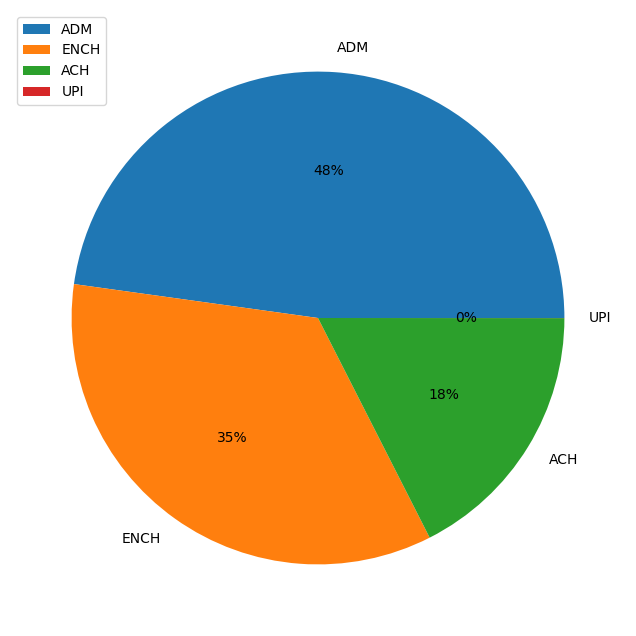

In [15]:
type = data['PAYMENT_TYPE'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

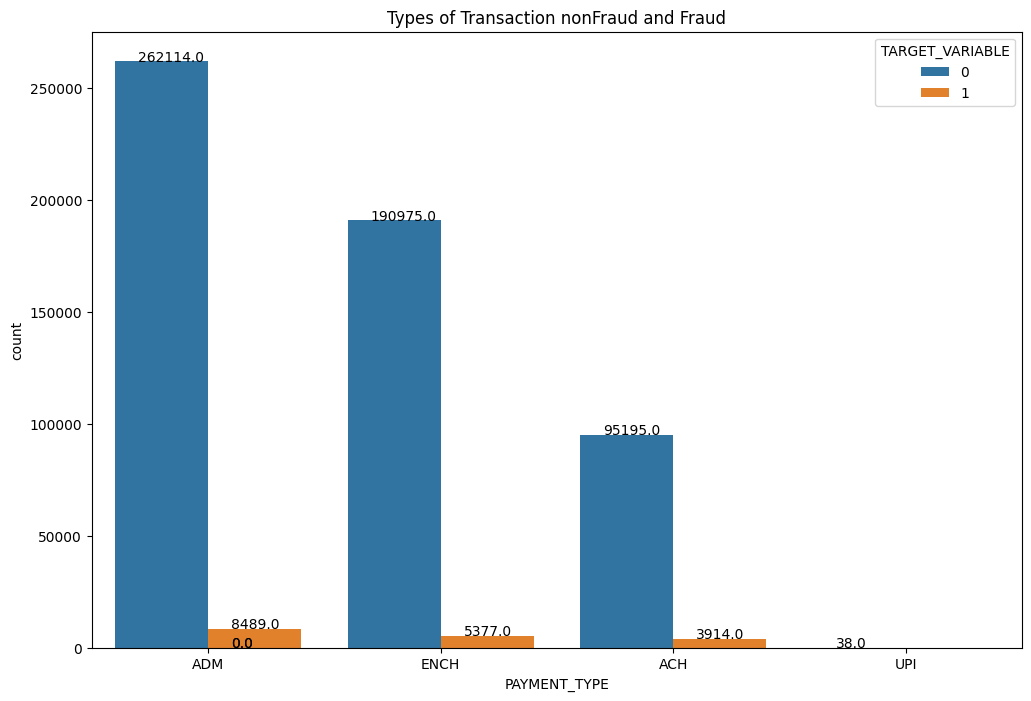

In [16]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x = "PAYMENT_TYPE", hue="TARGET_VARIABLE", data = data)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(exclude=['int64', 'float64']).columns
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)
transformed_data = column_transformer.fit_transform(data)

In [35]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns
numeric_features.drop('TARGET_VARIABLE')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components=10))
])


svd_result = pipeline.fit_transform(data)

svd_df = pd.DataFrame(data=svd_result)
svd_df['TARGET_VARIABLE'] = data['TARGET_VARIABLE']

print(svd_df)

                0         1         2         3         4         5         6  \
0       -1.968797  2.394271 -1.267903 -0.190327 -0.377481  0.474230  0.368990   
1        1.966596  2.373173 -1.921758 -1.563729 -2.406999  1.115842 -0.215967   
2       -0.160010  2.185514  0.570370 -1.060636 -0.798830  0.849622  0.888990   
3        1.894060  2.673511 -2.080563  0.742767  0.028235  1.631148 -0.241399   
4        2.511622  2.504553 -1.267301 -3.102436  2.572441  0.145496  2.955346   
...           ...       ...       ...       ...       ...       ...       ...   
566097  -1.597149  1.919469  4.589283 -0.550522 -0.531295  0.583744  0.307239   
566098  -1.780755  1.765053  2.298109 -0.217597 -0.540072  0.669529  0.426836   
566099  -1.244796  2.057789 -0.171804 -1.236713  0.769016  1.005662 -1.284428   
566100  13.014849  1.792355  2.212902 -0.957521 -1.474225  6.554204 -0.954253   
566101  -1.411727  1.697151 -0.732906 -1.803661 -1.252319  1.228073  0.011023   

               7         8 

In [36]:
svd_df['TARGET_VARIABLE'] = data['TARGET_VARIABLE']
newdata = svd_df.drop(columns=['TARGET_VARIABLE'])
print(newdata)

                0         1         2         3         4         5         6  \
0       -1.968797  2.394271 -1.267903 -0.190327 -0.377481  0.474230  0.368990   
1        1.966596  2.373173 -1.921758 -1.563729 -2.406999  1.115842 -0.215967   
2       -0.160010  2.185514  0.570370 -1.060636 -0.798830  0.849622  0.888990   
3        1.894060  2.673511 -2.080563  0.742767  0.028235  1.631148 -0.241399   
4        2.511622  2.504553 -1.267301 -3.102436  2.572441  0.145496  2.955346   
...           ...       ...       ...       ...       ...       ...       ...   
566097  -1.597149  1.919469  4.589283 -0.550522 -0.531295  0.583744  0.307239   
566098  -1.780755  1.765053  2.298109 -0.217597 -0.540072  0.669529  0.426836   
566099  -1.244796  2.057789 -0.171804 -1.236713  0.769016  1.005662 -1.284428   
566100  13.014849  1.792355  2.212902 -0.957521 -1.474225  6.554204 -0.954253   
566101  -1.411727  1.697151 -0.732906 -1.803661 -1.252319  1.228073  0.011023   

               7         8 

In [22]:
numeric_features.drop('TARGET_VARIABLE')

Index(['LOAN_NUMBER', 'CUST_PINCODE', 'TENUR', 'ADVANCE_EMI_COUNT', 'EMI',
       'LTV', 'ASSET_COST', 'ACTUAL_LOAN_AMOUNT', 'DOWN_PAYMENT', 'CUST_AGE',
       'MATCH_SCORE', 'TOTAL_NO_LV_TRADELINES', 'BUREAU_VINTAGE_IN_MONTHS',
       'NO_TRADELINES_OPENED_LAST_3M', 'TOTAL_NO_LV_CD',
       'TIME_SINCE_FIRST_CD_MONTHS', 'NO_CD_OPENED_LAST_3M', 'TOTAL_NO_LV_CC',
       'NO_CC_OPENED_LAST_3M', 'TOTAL_NO_LV_PLBL', 'TOTAL_NO_LV_AL',
       'TOTAL_NO_LV_TW', 'TOTAL_NO_LV_TL', 'TOTAL_NO_LV_SEC',
       'TOTAL_NO_SEC_OPENED_LAST_3M', 'TOTAL_NO_LV_UNSEC',
       'TOTAL_NO_UNSEC_OPENED_LAST_3M', 'TOTAL_NO_ENQ', 'TOTAL_NO_ENQ_LAST_3M',
       'TOTAL_NO_ENQ_CD', 'TOTAL_NO_ENQ_CD_LAST_3M', 'TOTAL_NO_ENQ_SEC',
       'TOTAL_NO_ENQ_SEC_LAST_3M', 'TOTAL_NO_ENQ_UNSEC',
       'TOTAL_NO_ENQ_UNSEC_LAST_3M', 'BUREAU_SCORE'],
      dtype='object')

In [23]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



X = newdata
y = data['TARGET_VARIABLE'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    164472
           1       1.00      1.00      1.00      5359

    accuracy                           1.00    169831
   macro avg       1.00      1.00      1.00    169831
weighted avg       1.00      1.00      1.00    169831



In [25]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


X = newdata 
y = data['TARGET_VARIABLE']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), X_train.select_dtypes(include=['object']).columns)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components=15)),
    ('classifier', LogisticRegression())
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.982347156879486
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    164472
           1       0.79      0.60      0.68      5359

    accuracy                           0.98    169831
   macro avg       0.89      0.80      0.84    169831
weighted avg       0.98      0.98      0.98    169831



In [34]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier 


X = newdata 
y = data['TARGET_VARIABLE']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), X_train.select_dtypes(include=['object']).columns)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components=12)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))  # XGBoost model
])

pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9882235869776425
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    164472
           1       0.88      0.73      0.80      5359

    accuracy                           0.99    169831
   macro avg       0.94      0.86      0.89    169831
weighted avg       0.99      0.99      0.99    169831

